In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from Framework import generic_framework
from forward_models import ct
from data_pips import LUNA
from data_pips import ellipses

import util as ut
from util import dilated_conv_layer
import tensorflow as tf

sess = tf.InteractiveSession()
net_input = tf.placeholder(shape=[None, 128, 128, 1],
                                     dtype=tf.float32)

In [14]:
net_input.get_shape().as_list()

[None, 128, 128, 1]

In [2]:
from Framework import adversarial_regulariser
test_Ar = adversarial_regulariser()

Training Data found: 397
Evaluation Data found: 278


No save found


(16, 128, 128, 1)
-0.238926
0.761074
-3.72529e-09
33.6428


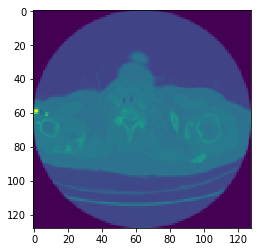

In [5]:
y, x_true, fbp = data.generate_data(16)
pic = x_true
i = 1
print(pic.shape)
print(np.amin(pic[i,...]))
print(np.amax(pic[i,...]))
print(np.average(pic[i,...]))
dif = x_true[i,...,0] - fbp[i,...,0]
print(np.sum(np.square(dif)))
plt.imshow(pic[i,...,0])
plt.show()

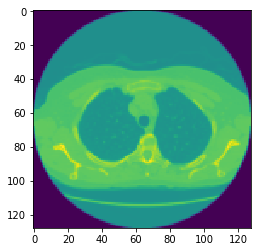

237
0


In [18]:
path = pp.get_random_path()
image = pp.get_pic(path)
plt.figure()
plt.imshow(image)
plt.show()
print(np.amax(image))
print(np.amin(image))

In [13]:
list = pp.find('*.dcm', './Train_Data')
print(len(list))

397


In [15]:
import platform
platform.node()

'LAPTOP-E6AJ1CPF'

In [6]:
import numpy as np
true, cor = denoiser.generate_local_input(128)
recon = np.copy(cor)

In [23]:
var = input("Please enter something: ")
print("You entered " + str(var))

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.